In [42]:
import pymysql
import pandas as pd

In [43]:
# Database connection details
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "javeed",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [44]:
# SQL Queries
queries = {
    "question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail" :
        """SELECT
            DATE_FORMAT(order_date, '%m') AS Month_ID,
            DATE_FORMAT(order_date, '%M') AS Month,
            DATE_FORMAT(order_date, '%Y') AS Year,
            SUM(after_discount) AS total_transaction
        FROM order_detail
        WHERE YEAR(order_date) = 2021 
          AND is_valid = 1
        GROUP BY Month_ID, Month, Year
        ORDER BY total_transaction DESC;
    """,
    "question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail" :
    """
        SELECT
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            skudet.category,
            SUM(ordet.after_discount) AS total_transaction
        FROM
            order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
        WHERE
            ordet.is_valid = 1 
            AND DATE_FORMAT(ordet.order_date, '%Y') = '2022'
        GROUP BY
            DATE_FORMAT(ordet.order_date, '%Y'),
            skudet.category
        ORDER BY
            total_transaction DESC;
    """,
    "question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail":
    """
        WITH final_table AS (
            SELECT
                skudet.category,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2021 THEN ordet.after_discount END) AS transaction_2021,
                SUM(CASE WHEN YEAR(ordet.order_date) = 2022 THEN ordet.after_discount END) AS transaction_2022
            FROM order_detail AS ordet
            JOIN sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE ordet.is_valid = 1
            GROUP BY skudet.category
        )
        SELECT *, (transaction_2022 - transaction_2021) AS delta,
        CASE WHEN transaction_2022 > transaction_2021 THEN 'INCREASE' ELSE 'DECREASE' END AS remark
        FROM final_table;
    """,
    "question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail" :
    """
        SELECT
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y') AS year,
            COUNT(DISTINCT ordet.id) AS freq
        FROM
            order_detail AS ordet
        JOIN
            payment_detail AS paydet ON ordet.payment_id = paydet.id
        WHERE
            ordet.is_valid = 1 
            AND YEAR(ordet.order_date) = 2022
        GROUP BY
            paydet.payment_method,
            DATE_FORMAT(ordet.order_date, '%Y')
        ORDER BY
            freq DESC
        LIMIT 5;
    """,
    "question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data." :
    """
        WITH final_table AS (
            SELECT
                CASE
                    WHEN LOWER(skudet.sku_name) LIKE '%samsung%' THEN 'Samsung'
                    WHEN LOWER(skudet.sku_name) LIKE '%apple%' 
                         OR LOWER(skudet.sku_name) LIKE '%iphone%' 
                         OR LOWER(skudet.sku_name) LIKE '%macbook%' THEN 'Apple'
                    WHEN LOWER(skudet.sku_name) LIKE '%sony%' THEN 'Sony'
                    WHEN LOWER(skudet.sku_name) LIKE '%huawei%' THEN 'Huawei'
                    WHEN LOWER(skudet.sku_name) LIKE '%lenovo%' THEN 'Lenovo'
                END AS product_brand,
                SUM(ordet.after_discount) AS total_transaction
            FROM
                order_detail AS ordet
            JOIN
                sku_detail AS skudet ON ordet.sku_id = skudet.id
            WHERE
                ordet.is_valid = 1
            GROUP BY
                product_brand
        )
        SELECT *
        FROM final_table
        WHERE product_brand IS NOT NULL
        ORDER BY total_transaction DESC;
    """
}

In [45]:
from IPython.display import display

In [46]:
# Connect to the database
try:
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")
    
    # Execute each query and display results
    for question, query in queries.items():
        print(f"\n--- {question} ---")
        df = pd.read_sql(query, connection)
        display(df)  # Display the DataFrame in the notebook
        
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!

--- question1: During the transactions that occurred in 2021, in which month did the total transaction value (after_discount) reach its highest? Use is_valid = 1 to filter transaction data. Source table : order_detail ---


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,Month_ID,Month,Year,total_transaction
0,08,August,2021,2.249434e+08
1,12,December,2021,2.158624e+08
2,10,October,2021,2.069659e+08
3,11,November,2021,1.790446e+08
4,07,July,2021,1.479654e+08
5,09,September,2021,1.421678e+08
6,06,June,2021,3.813349e+07
7,01,January,2021,3.682213e+07
8,02,February,2021,3.561180e+07
9,05,May,2021,3.366361e+07



--- question2 During transactions in the year 2022, which category generated the highest transaction value? Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,year,category,total_transaction
0,2022,Mobiles & Tablets,9.128256e+08
1,2022,Entertainment,3.611392e+08
2,2022,Appliances,3.095840e+08
3,2022,Computing,2.124082e+08
4,2022,Men Fashion,1.333326e+08
5,2022,Women Fashion,9.023613e+07
6,2022,Home & Living,7.865896e+07
7,2022,Health & Sports,5.200838e+07
8,2022,Beauty & Grooming,4.559842e+07
9,2022,Superstore,3.264327e+07



--- question3 Compare the transaction values of each category in the years 2021 and 2022. Mention which categories experienced an increase and which categories experienced a decrease in transaction values from 2021 to 2022. Use is_valid = 1 to filter transaction data. Source table : order_detail, sku_detail ---


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,category,transaction_2021,transaction_2022,delta,remark
0,Kids & Baby,2.373622e+07,2.571818e+07,1.981969e+06,INCREASE
1,Men Fashion,5.787478e+07,1.333326e+08,7.545786e+07,INCREASE
2,Computing,1.728789e+08,2.124082e+08,3.952934e+07,INCREASE
3,School & Education,1.138840e+07,1.730505e+07,5.916641e+06,INCREASE
4,Women Fashion,8.404596e+07,9.023613e+07,6.190171e+06,INCREASE
5,Superstore,2.861523e+07,3.264327e+07,4.028039e+06,INCREASE
6,Appliances,2.185502e+08,3.095840e+08,9.103381e+07,INCREASE
7,Entertainment,1.523808e+08,3.611392e+08,2.087583e+08,INCREASE
8,Mobiles & Tablets,3.706067e+08,9.128256e+08,5.422189e+08,INCREASE
9,Health & Sports,3.316841e+07,5.200838e+07,1.883997e+07,INCREASE



--- question4 Display the top 5 most popular payment methods used during 2022 (based on total unique orders). Use is_valid = 1 to filter transaction data. Source table : order_detail, payment_detail ---


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,payment_method,year,freq
0,cod,2022,1809
1,Payaxis,2022,181
2,customercredit,2022,75
3,Easypay,2022,69
4,jazzwallet,2022,26



--- question5 Sort these 5 products based on their transaction values. 1. Samsung, 2. Apple, 3. Sony, 4. Huawei, 5. Lenovo Use is_valid = 1 to filter transaction data. ---


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1002502647.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,product_brand,total_transaction
0,Samsung,5.781356e+08
1,Apple,4.448554e+08
2,Huawei,6.316026e+07
3,Sony,6.239182e+07
4,Lenovo,6.237980e+07


Database connection closed.


In [47]:
import os

In [48]:
# Database connection details
db_config = {
    "host": "localhost",  # Change to your database host
    "user": "root",       # Change to your database username
    "password": "javeed",  # Change to your database password
    "database": "sales"  # Change to your database name
}

In [49]:
# Folder path to save CSV files
output_folder = r"C:\Users\Mohamed Javeed\Google looker studio project"  # Replace with your folder path
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

In [50]:
# List of tables to export
tables = ["order_detail", "sku_detail", "payment_detail","customer_detail"]  # Add your table names here

In [57]:
try:
    # Connect to the database
    connection = pymysql.connect(**db_config)
    print("Database connection successful!")

    for table in tables:
        print(f"Exporting table: {table}")
        
        # SQL query to fetch all data from the table
        query = f"SELECT * FROM {table};"
        
        # Read table data into a DataFrame
        df = pd.read_sql(query, connection)
        
        # Save the DataFrame to a CSV file
        output_file = os.path.join(output_folder, f"{table}.csv")
        df.to_csv(output_file, index=False)
        
        print(f"Table {table} exported successfully to {output_file}.")

except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if connection:
        connection.close()
        print("Database connection closed.")

Database connection successful!
Exporting table: order_detail


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1590211234.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


Table order_detail exported successfully to C:\Users\Mohamed Javeed\Google looker studio project\order_detail.csv.
Exporting table: sku_detail
Table sku_detail exported successfully to C:\Users\Mohamed Javeed\Google looker studio project\sku_detail.csv.
Exporting table: payment_detail
Table payment_detail exported successfully to C:\Users\Mohamed Javeed\Google looker studio project\payment_detail.csv.
Exporting table: customer_detail
Table customer_detail exported successfully to C:\Users\Mohamed Javeed\Google looker studio project\customer_detail.csv.
Database connection closed.


In [61]:
df_od = pd.read_csv(r"C:\Users\Mohamed Javeed\Google looker studio project\order_detail.csv")
df_sd = pd.read_csv(r"C:\Users\Mohamed Javeed\Google looker studio project\sku_detail.csv")
df_pd = pd.read_csv(r"C:\Users\Mohamed Javeed\Google looker studio project\payment_detail.csv")
df_cd = pd.read_csv(r"C:\Users\Mohamed Javeed\Google looker studio project\customer_detail.csv")

In [62]:
# Merge the dataframes
# Before merge we need to rename column in order to avoid duplicate column value
# So the key column will be excluded when joined
df_sd.rename(columns={'id':'sku_id'}, inplace=True)
df_cd.rename(columns={'id':'customer_id'}, inplace=True)
df_pd.rename(columns={'id':'payment_id'}, inplace=True)

In [63]:
# Merge the dataframes using left join
df = pd.DataFrame(df_od\
                  # Merge order_detail with sku_detail on column sku_id
                  .merge(df_sd, how='left', on='sku_id')\
                  # Merge the result to customer_detail on column customer_id
                  .merge(df_cd, how='left', on='customer_id')\
                  # Merge the result to payment_detail on column payment_id
                  .merge(df_pd, how='left', on='payment_id')
                  )

In [64]:
# check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23056 entries, 0 to 23055
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               23056 non-null  object 
 1   customer_id      23056 non-null  object 
 2   order_date       23056 non-null  object 
 3   sku_id           23056 non-null  object 
 4   price            23056 non-null  int64  
 5   qty_ordered      23056 non-null  int64  
 6   before_discount  23056 non-null  float64
 7   discount_amount  23056 non-null  float64
 8   after_discount   23056 non-null  float64
 9   is_gross         23056 non-null  int64  
 10  is_valid         23056 non-null  int64  
 11  is_net           23056 non-null  int64  
 12  payment_id       23056 non-null  int64  
 13  sku_name         23056 non-null  object 
 14  base_price       23056 non-null  float64
 15  cogs             23056 non-null  float64
 16  category         23056 non-null  object 
 17  registered_d

In [65]:
print(df_pd.columns)

Index(['payment_id', 'payment_method'], dtype='object')


In [66]:
print(df_od.columns)

Index(['id', 'customer_id', 'order_date', 'sku_id', 'price', 'qty_ordered',
       'before_discount', 'discount_amount', 'after_discount', 'is_gross',
       'is_valid', 'is_net', 'payment_id'],
      dtype='object')


In [67]:
# Ensure both columns have the same data type before merging
df_pd['payment_id'] = df_pd['payment_id'].astype(str)  # Convert to string
df_od['id'] = df_od['id'].astype(str)                  # Convert to string

# Merge order_detail with payment_detail without renaming columns
df_sample = pd.merge(df_pd, df_od, how='left', left_on='payment_id', right_on='id')

# Display info about the resulting DataFrame
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   payment_id_x     32 non-null     object 
 1   payment_method   32 non-null     object 
 2   id               0 non-null      object 
 3   customer_id      0 non-null      object 
 4   order_date       0 non-null      object 
 5   sku_id           0 non-null      object 
 6   price            0 non-null      float64
 7   qty_ordered      0 non-null      float64
 8   before_discount  0 non-null      float64
 9   discount_amount  0 non-null      float64
 10  after_discount   0 non-null      float64
 11  is_gross         0 non-null      float64
 12  is_valid         0 non-null      float64
 13  is_net           0 non-null      float64
 14  payment_id_y     0 non-null      float64
dtypes: float64(9), object(6)
memory usage: 3.9+ KB


In [68]:
# change columns to datetime format using for loop
# use pandas.to_datetime to convert
for x in ['order_date', 'registered_date']:
  df[x] = pd.to_datetime(df[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23056 entries, 0 to 23055
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               23056 non-null  object        
 1   customer_id      23056 non-null  object        
 2   order_date       23056 non-null  datetime64[ns]
 3   sku_id           23056 non-null  object        
 4   price            23056 non-null  int64         
 5   qty_ordered      23056 non-null  int64         
 6   before_discount  23056 non-null  float64       
 7   discount_amount  23056 non-null  float64       
 8   after_discount   23056 non-null  float64       
 9   is_gross         23056 non-null  int64         
 10  is_valid         23056 non-null  int64         
 11  is_net           23056 non-null  int64         
 12  payment_id       23056 non-null  int64         
 13  sku_name         23056 non-null  object        
 14  base_price       23056 non-null  float

# Question 1
Dear Data Analyst,

As part of our Year-End Festival competition, the company plans to award prizes to our top customers. To facilitate this, the Marketing Team requires an analysis to estimate the prizes for the winners. Specifically, we need data on the TOP 5 Products in the Mobiles & Tablets Category for the year 2022, ranked by the highest sales quantities (where valid = 1).
We would appreciate it if you could compile and share this information with us before the end of this month to ensure we meet our planning deadlines.

Thank you for your continued support and collaboration.

Best regards,
Marketing Teameting Team

In [69]:
# Answer No 1
top_5_prod = pd.DataFrame(\
                          # filter the columns as needed
                          df[(df['category']=='Mobiles & Tablets') & (df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                          # aggregate using groupby method
                          .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                          # reset the index to convert result into dataframe
                          .reset_index(name='qty_ordered')\
                          # sort the value from the largest to the lowest
                          .sort_values(by='qty_ordered', ascending=False)\
                          # select top 5 row
                          .head(5).reset_index(drop=True)
                          )
top_5_prod

,sku_name,category,qty_ordered
0,IDROID_BALRX7-Gold,Mobiles & Tablets,4000
1,IDROID_BALRX7-Jet black,Mobiles & Tablets,124
2,Infinix Hot 4-Gold,Mobiles & Tablets,60
3,samsung_Grand Prime Plus-Black,Mobiles & Tablets,44
4,infinix_Zero 4-Grey,Mobiles & Tablets,40


<Axes: title={'center': 'TOP 5 Products'}, xlabel='Product Name', ylabel='Quantity'>

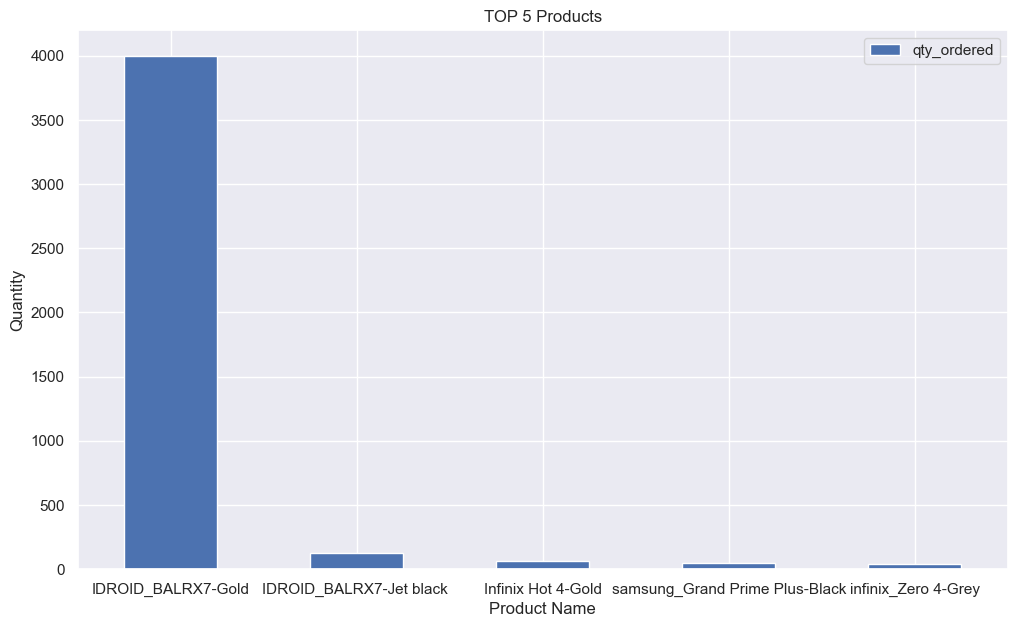

In [70]:
# show the chart
import seaborn as sns
# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='bar',
           grid = True,
           xlabel = 'Product Name',
           ylabel = 'Quantity',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

<Axes: title={'center': 'TOP 5 Products'}, xlabel='Quantity', ylabel='Product Name'>

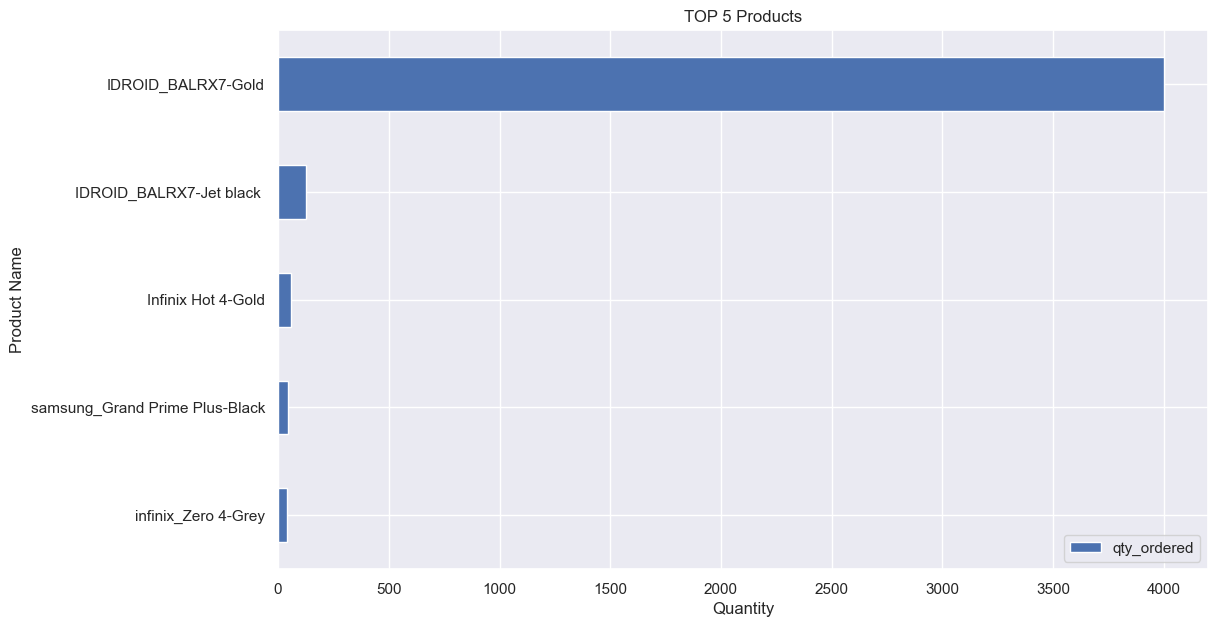

In [71]:
# show the chart
# change sort to ascending to show the highest from top to bottow on horizontal bar chart
top_5_prod.sort_values(by='qty_ordered', ascending=True, inplace=True)

# plot
sns.set()
top_5_prod.plot(x='sku_name',
           y=['qty_ordered'],
           kind='barh', # barh for horizontal bar chart
           grid = True,
           xlabel = 'Quantity',
           ylabel = 'Product Name',
           figsize=(12,7),
           rot = 0,
           title = 'TOP 5 Products',
           table = False,
           secondary_y = False)

# Question 2

Dear Data Analyst,

Following a recent discussion between the Warehouse and Marketing Teams, we have identified a notable surplus in stock for products in the “Others” category as of the end of 2022.

We kindly request your assistance in analyzing the sales data for this category for 2021, specifically focusing on sales quantity. We suspect there has been a decline in sales quantity in 2022 compared to 2021. (Please also include data for the 15th category.)

If a decrease in sales quantity for the “Others” category is confirmed, we would appreciate it if you could provide details of the top 20 products that experienced the largest decrease in sales between 2022 and 2021. This information will support our discussion in the upcoming meeting.

Please share the requested data within 4 days. We sincerely appreciate your assistance and cooperation.

Best regards,
Warehouse Team

In [72]:
# Answer 2.1
# Create dataframe of all category, year 2021, aggregated by qty_ordered (sum)
cat_data_2021 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2021)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# Create dataframe of all category, year 2022, aggregated by qty_ordered (sum)
cat_data_2022 = pd.DataFrame(\
                           # filter is_valid = 1 and year 2021
                           df[(df['is_valid']==1) & (df['order_date'].dt.year == 2022)]\
                           # groupby quantity
                           .groupby(by=['category'])['qty_ordered'].sum()\
                           # convert to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# join those 2 dataframes
cat_data_2021_2022 = cat_data_2021.merge(cat_data_2022, how='outer', on='category')

# show
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022
0,Appliances,496,584
1,Beauty & Grooming,656,608
2,Books,684,780
3,Computing,436,604
4,Entertainment,292,596
5,Health & Sports,672,788
6,Home & Living,756,996
7,Kids & Baby,664,896
8,Men Fashion,940,692
9,Mobiles & Tablets,428,4612


In [73]:
# add new column named 'qty_growth' 
cat_data_2021_2022['qty_growth'] = cat_data_2021_2022['qty_ordered_2022'] - cat_data_2021_2022['qty_ordered_2021']

# add new column name 'growth_percentage'
cat_data_2021_2022 = cat_data_2021_2022.assign(growth_percentage=lambda x: round((x['qty_growth'] / x['qty_ordered_2021'] * 100),2))

# add new column 'remark' in order to classify the 'qty_growth' using a function to calculate
def updown_check(delta):
  if delta < 0:
    return 'DOWN'
  elif delta == 0:
    return 'FAIR'
  else:
    return 'UP'

# add new column 'remark'
cat_data_2021_2022['remark'] = cat_data_2021_2022['qty_growth'].apply(updown_check)

# sort from the smallest to largest on column qty_growth and reset the index
cat_data_2021_2022.sort_values(by='qty_growth', ascending=True, inplace=True)
cat_data_2021_2022.reset_index(drop=True, inplace=True)

# show the data
cat_data_2021_2022

,category,qty_ordered_2021,qty_ordered_2022,qty_growth,growth_percentage,remark
0,Others,1688,1016,-672,-39.81,DOWN
1,Soghaat,3012,2428,-584,-19.39,DOWN
2,Men Fashion,940,692,-248,-26.38,DOWN
3,Beauty & Grooming,656,608,-48,-7.32,DOWN
4,Appliances,496,584,88,17.74,UP
5,Books,684,780,96,14.04,UP
6,Health & Sports,672,788,116,17.26,UP
7,Computing,436,604,168,38.53,UP
8,School & Education,728,940,212,29.12,UP
9,Kids & Baby,664,896,232,34.94,UP


Text(0.5, 0, 'Quantity')

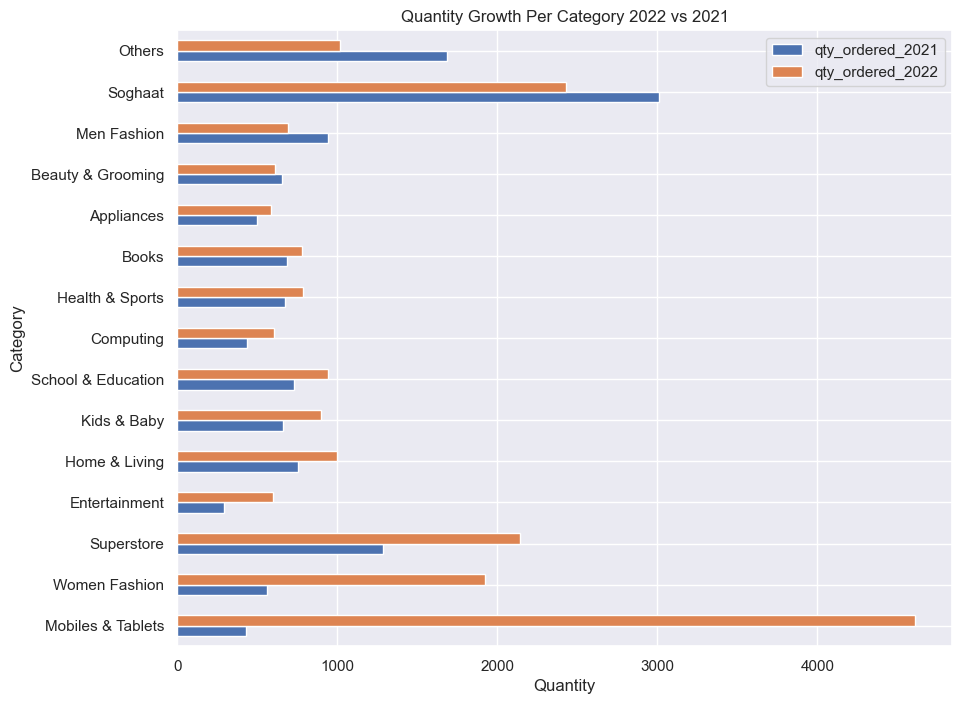

In [74]:
import matplotlib.pyplot as plt
# sort before plot
cat_data_2021_2022.sort_values(by='qty_growth', ascending=False, inplace=True)

# plot to show qty_ordered_2021 and qty_ordered_2022, horizontal bar
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['qty_ordered_2021','qty_ordered_2022'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Quantity Growth Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

Text(0.5, 0, 'Quantity')

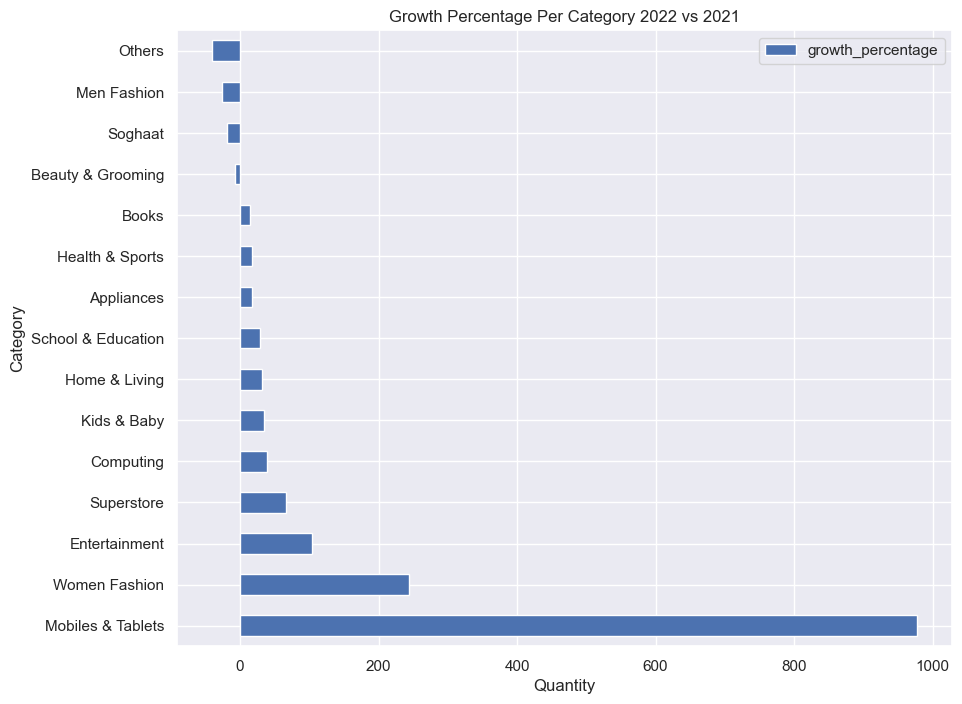

In [75]:
# sort before plot
cat_data_2021_2022.sort_values(by='growth_percentage', ascending=False, inplace=True)

# show growth_percentage
sns.set()
cat_data_2021_2022.plot(x='category',\
                        y=['growth_percentage'],\
                        kind='barh',\
                        figsize=(10, 8)\
                        )
plt.title('Growth Percentage Per Category 2022 vs 2021')
plt.ylabel('Category')
plt.xlabel('Quantity')

In [76]:
# Answer 2.2

# Create dataframe with filter category = Others, year of 2022, is_valid = 1
# Aggregate qty_ordered (sum)
others_2022 = pd.DataFrame(\
                           # filter 2022
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2022)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2022')
                           )

# Create dataframe with filter category = Others, year of 2021, is_valid = 1
# Aggregate qty_ordered (sum)
others_2021 = pd.DataFrame(\
                           # filter 2021
                           df[(df['category']=='Others') & (df['is_valid']==1)\
                              & (df['order_date'].dt.year == 2021)]\
                           # groupby, aggregate qty_ordered, include sku_name (product name)
                           .groupby(by=['sku_name','category'])['qty_ordered'].sum()\
                           # convert series to dataframe
                           .reset_index(name='qty_ordered_2021')
                           )

# JOIN the dataframes
others_2021_2022 = others_2021.merge(others_2022[['sku_name', 'qty_ordered_2022']], how='outer', on='sku_name')

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,NaN,NaN,4.0
1,Aladdin_Wrench_Snap N Grip_01,Others,4.0,NaN
2,Aladdin_bike_cover,Others,12.0,8.0
3,Alerashine_sku-09-XL,NaN,NaN,4.0
4,Am-PTV_ATS-004-M,Others,20.0,NaN
...,...,...,...,...
157,stripyinterior_100006,Others,4.0,NaN
158,sukoonbundle-sukoon10-cj_CJPOISL,NaN,NaN,4.0
159,test-product-00,NaN,NaN,4.0
160,tucano_IPD7AN-BK,Others,4.0,NaN


In [77]:
# fill "NaN" with "Others" in column "category"
others_2021_2022['category'].fillna('Others', inplace=True)

# fill the rest "NaN" with 0
others_2021_2022.fillna(0, inplace=True)

# show the data
others_2021_2022

C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\3842611649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  others_2021_2022['category'].fillna('Others', inplace=True)


,sku_name,category,qty_ordered_2021,qty_ordered_2022
0,AL Khair_Baby Oil 50ml,Others,0.0,4.0
1,Aladdin_Wrench_Snap N Grip_01,Others,4.0,0.0
2,Aladdin_bike_cover,Others,12.0,8.0
3,Alerashine_sku-09-XL,Others,0.0,4.0
4,Am-PTV_ATS-004-M,Others,20.0,0.0
...,...,...,...,...
157,stripyinterior_100006,Others,4.0,0.0
158,sukoonbundle-sukoon10-cj_CJPOISL,Others,0.0,4.0
159,test-product-00,Others,0.0,4.0
160,tucano_IPD7AN-BK,Others,4.0,0.0


In [78]:
# add column delta_2022_2021
others_2021_2022['delta_2022_2021'] = others_2021_2022['qty_ordered_2022'] - others_2021_2022['qty_ordered_2021']

# add column remark using function "updown_check"
others_2021_2022['remark'] = others_2021_2022['delta_2022_2021'].apply(updown_check)

# sort_values from the smallest to largest
others_2021_2022.sort_values(by='delta_2022_2021', ascending=True, inplace=True)

# reset the index
others_2021_2022.reset_index(drop=True, inplace=True)

# show the data
others_2021_2022

,sku_name,category,qty_ordered_2021,qty_ordered_2022,delta_2022_2021,remark
0,RB_Dettol Germ Busting Kit-bf,Others,800.0,160.0,-640.0,DOWN
1,Dawlance_MD 10 + DWB 600,Others,92.0,0.0,-92.0,DOWN
2,Telemall_MM-DR-HB-L,Others,92.0,8.0,-84.0,DOWN
3,iu_Tickets General Enclosure-Islamabad,Others,80.0,0.0,-80.0,DOWN
4,RS_Rehmat-e-Shereen Mix Mithai,Others,52.0,0.0,-52.0,DOWN
...,...,...,...,...,...,...
157,Entertainer Asia_Vouch 365-2017 BookLahore,Others,0.0,28.0,28.0,UP
158,TCF_Educate-a-Child-for-a-Month,Others,0.0,32.0,32.0,UP
159,shoppers stop_MagicGlass-3,Others,0.0,52.0,52.0,UP
160,SKMT_Medicine,Others,0.0,80.0,80.0,UP


C:\Users\Mohamed Javeed\AppData\Local\Temp\ipykernel_3016\1013559605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)


Text(0.5, 0, 'Delta 2022_2021')

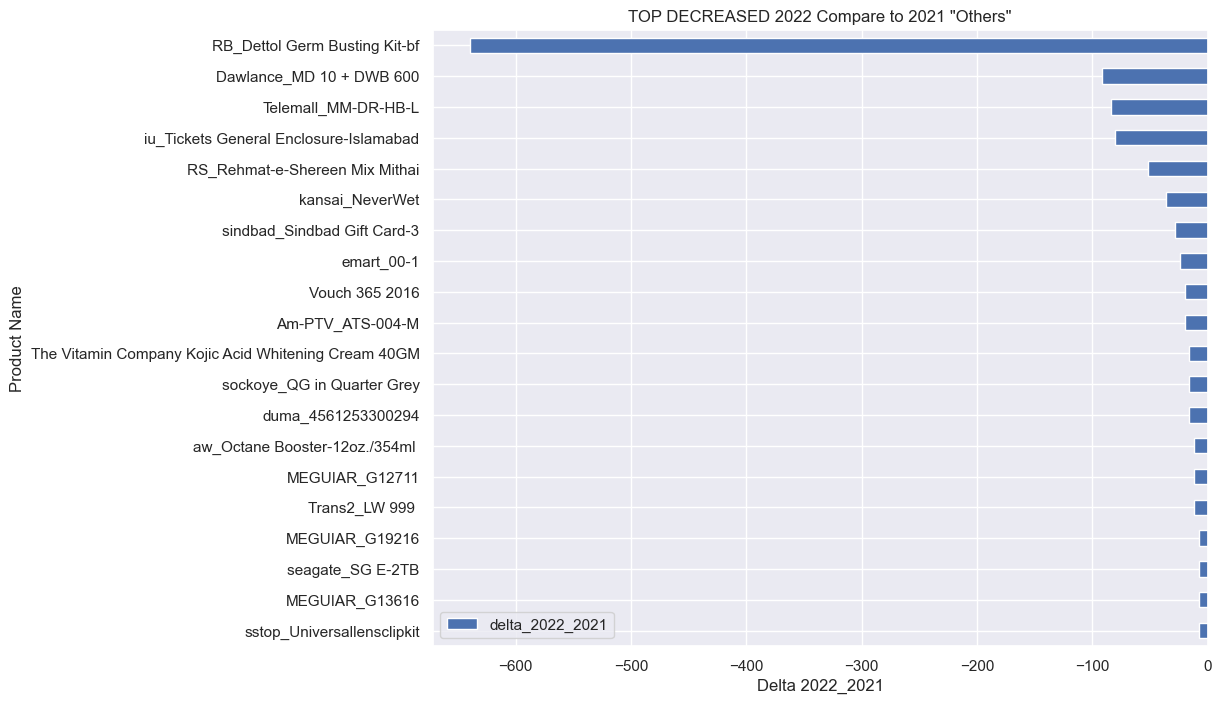

In [79]:
# choose 20 products to show (from the smallest)
others_2021_2022 = others_2021_2022.head(20)
others_2021_2022.sort_values(by='delta_2022_2021', ascending=False, inplace=True)

# plot
sns.set()
others_2021_2022.plot(x='sku_name',\
                      y='delta_2022_2021',\
                      kind='barh',\
                      figsize=(10, 8))
plt.title('TOP DECREASED 2022 Compare to 2021 "Others"')
plt.ylabel('Product Name')
plt.xlabel('Delta 2022_2021')

# Question 3

Dear Data Analyst,

As we prepare for the company’s upcoming anniversary in two months, the Digital Marketing Team plans to share promotional information with customers by the end of this month. To support this initiative, we require data on customers who completed the check-out process but have not yet made a payment (is_gross = 1) during the year 2022. Specifically, we need the Customer IDs and their Registered Dates.

We kindly request your assistance in compiling and delivering this data to the Digital Marketing Team before the month’s end. Your support in this matter is greatly appreciated.

Best regards,
Digital Marketing Team

In [80]:
# define dataframe with filter as requested
cs_gross_data = df.loc[:,['customer_id', 'registered_date']][(df['is_gross']==1) & (df['is_valid']==0) & (df['is_net']==0) & (df['order_date'].dt.year == 2022)]

# show the data
cs_gross_data

,customer_id,registered_date
0,C993531L,2021-11-08
1,C993531L,2021-11-08
2,C993531L,2021-11-08
3,C993531L,2021-11-08
32,C652751L,2022-07-19
...,...,...
23027,C317976L,2021-11-26
23028,C417245L,2022-07-26
23029,C417245L,2022-07-26
23030,C417245L,2022-07-26


In [81]:
# Validation
# compare unique customer_id from the dataframe with count of dataframe index
# use function
def check_customerid(x):
  unique_customerid = len(x['customer_id'].unique().tolist())
  rows_count = len(x.index)
  return [unique_customerid,rows_count]

# run validation 
test = check_customerid(cs_gross_data)
print('Data Before : ', test)

Data Before :  [820, 4092]


In [82]:
# run the logic
if test[0] == test[1]:
  print('There is no duplicated data.')
else:
  print('There is duplicated data.')
  # remove the duplicate
  cs_gross_data.drop_duplicates(inplace=True)
  print('Data After : ', check_customerid(cs_gross_data))

# reset the index and show final data
cs_gross_data.reset_index(drop=True, inplace=True)
cs_gross_data

There is duplicated data.
Data After :  [820, 820]


,customer_id,registered_date
0,C993531L,2021-11-08
1,C652751L,2022-07-19
2,C189144L,2022-07-01
3,C224183L,2022-04-07
4,C907186L,2022-05-08
...,...,...
815,C118563L,2022-06-07
816,C217246L,2022-08-04
817,C577176L,2022-06-01
818,C744990L,2022-05-21


# Question 4

Dear Data Analyst,

Between October and December 2022, we ran promotional campaigns every Saturday and Sunday. To evaluate their effectiveness, we would like your assistance in analyzing the following:

The average daily sales (before_discount) for weekends (Saturday and Sunday) compared to weekdays (Monday-Friday) for each month during this period. Please specify whether sales increased during weekends for each month.

The average daily sales (before_discount) for weekends versus weekdays across the entire three-month period.

We kindly request the data to be shared with us by the end of next week. Thank you for your continued support.

Best regards,
Campaign Team

In [83]:
# Answer No 4.1

# add column month_id, month_name, day_name, year
df['month_id'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_name'] = df['order_date'].dt.day_name()
df['year'] = df['order_date'].dt.year

In [84]:
# Create dataframe for weekends data October-December 2022
data_weekends = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekends')\
                             .sort_values(by='month_id', ascending=True)
                             )

# Create dataframe for weekdays data October-December 2022
data_weekdays = pd.DataFrame(\
                             # filter
                             df[(df['is_valid'] == 1) &\
                              (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                              (df['month_id'] >= 10) &\
                               (df['year'] == 2022)]\
                             # groupby, aggregate before_discount
                             .groupby(by=['month_id', 'month_name', 'year'])['before_discount'].mean()\
                             # round
                             .round(2)\
                             # convert series to dataframe
                             .reset_index(name='avg_sales_weekdays')\
                             .sort_values(by='month_id', ascending=True)
                             )

# merge the dataframe
data_weekdays_weekends = data_weekdays.merge(data_weekends)

# show the data
data_weekdays_weekends

,month_id,month_name,year,avg_sales_weekdays,avg_sales_weekends
0,10,October,2022,885671.82,634260.0
1,11,November,2022,641861.93,607794.0
2,12,December,2022,813973.74,410599.4


<Axes: xlabel='Month Name', ylabel='Average Sales'>

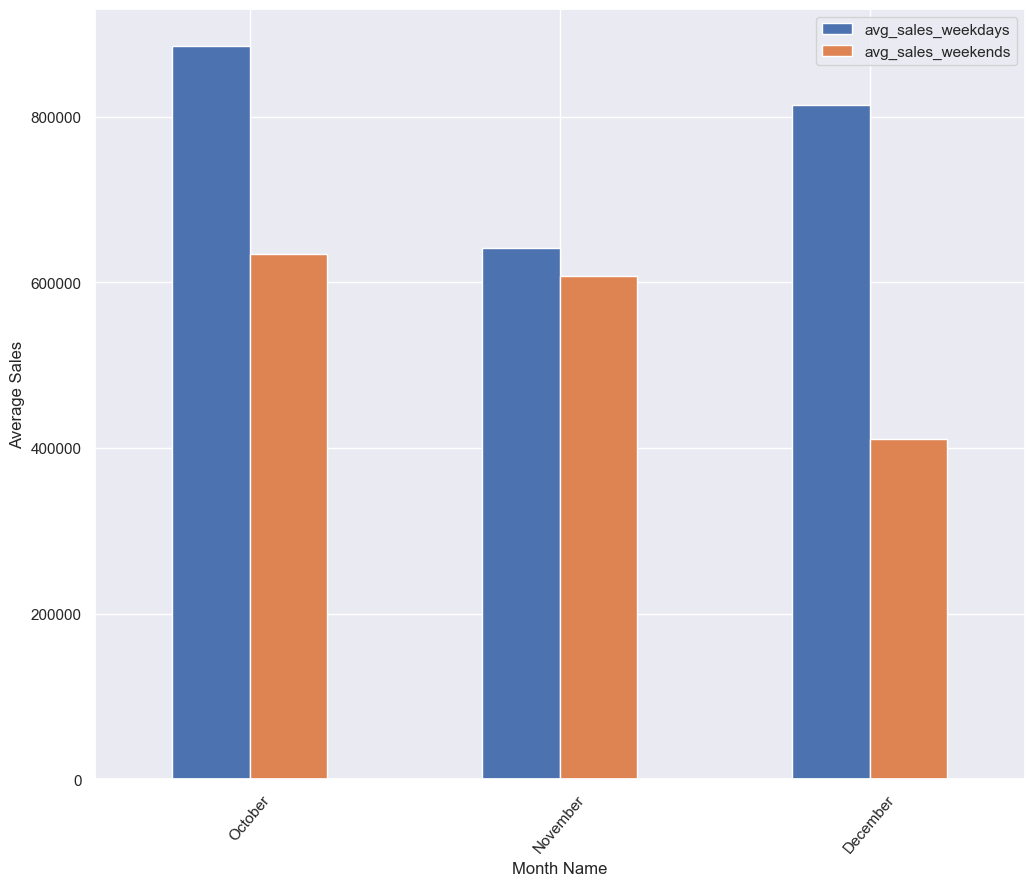

In [85]:
# plot the data
sns.set()
data_weekdays_weekends.plot(x='month_name',
                            y=['avg_sales_weekdays','avg_sales_weekends'],
                            kind='bar',
                            grid = True,
                            xlabel = 'Month Name',
                            ylabel = 'Average Sales',
                            figsize=(12,10),
                            rot = 50,  # for rotate the text in xlabel
                            table = False,
                            secondary_y = False)

In [86]:
# Answer No 4.2

# Filter dataframe df for weekends, October-December 2022
data_weekends_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Saturday', 'Sunday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Filter dataframe df for weekdays, October-December 2022
data_weekdays_all = df[(df['is_valid'] == 1) &\
                    (df['day_name'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) &\
                    (df['month_id'] >= 10) &\
                      (df['year'] == 2022)]

# Create dictionary
all_month_avg_compare = {\
                        'Period':'Total 3 months',\
                        'Avg Weekdays Sales': round(data_weekdays_all['before_discount'].mean(),2),\
                        'Avg Weekends Sales': round(data_weekends_all['before_discount'].mean(),2),\
                        'Diff (Value)': round(data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean(),2),\
                        'Diff (%)': pd.Series(round(((data_weekends_all['before_discount'].mean() - data_weekdays_all['before_discount'].mean())/data_weekends_all['before_discount'].mean())*100,2), dtype=str)+'%'
                        }

# create dataframe from dictionary
compare_avg_weekends_weekdays = pd.DataFrame(data=all_month_avg_compare, index=[0])

# show the data
compare_avg_weekends_weekdays

,Period,Avg Weekdays Sales,Avg Weekends Sales,Diff (Value),Diff (%)
0,Total 3 months,772341.0,558865.06,-213475.94,-38.2%


<Axes: xlabel='Period', ylabel='Average Sales'>

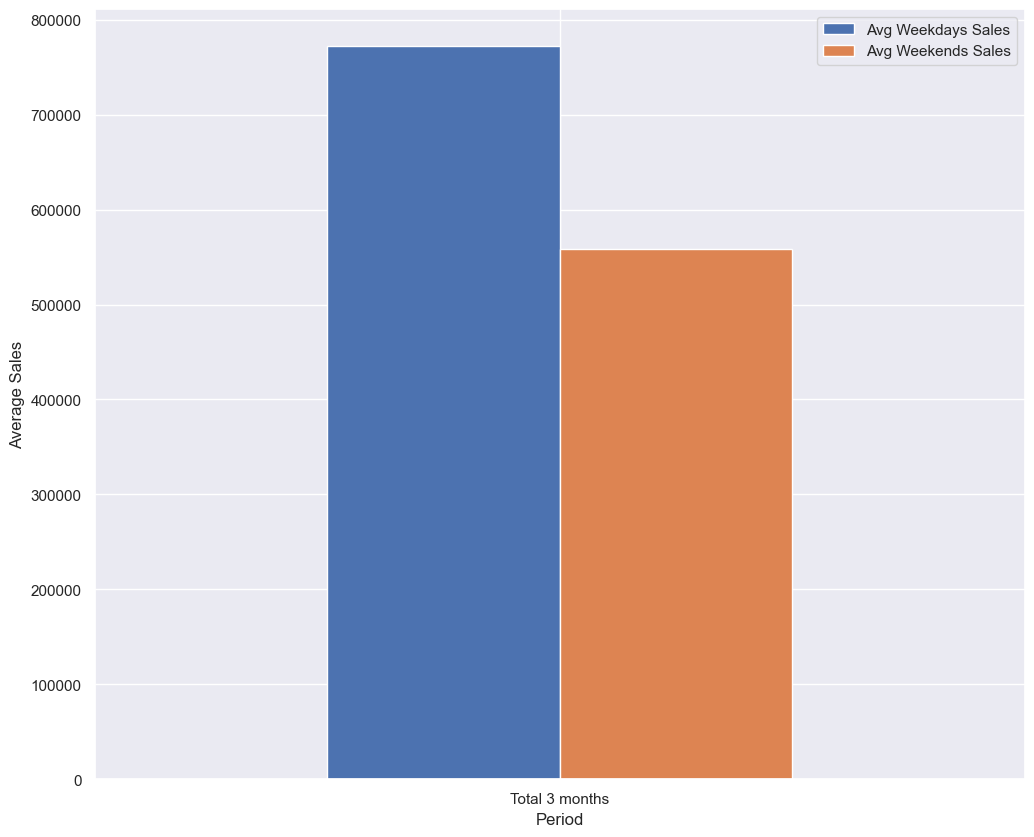

In [87]:
# plot the data
sns.set()
compare_avg_weekends_weekdays.plot(x='Period',
                                  y=['Avg Weekdays Sales','Avg Weekends Sales'],
                                  kind='bar',
                                  grid = True,
                                  # xlabel = 'Month Name',
                                  ylabel = 'Average Sales',
                                  figsize=(12,10),
                                  rot = 0,  # for rotate the text in xlabel
                                  table = False,
                                  secondary_y = False)

In [89]:
# Specify the file path and name
file_path = r"C:\Users\Mohamed Javeed\Google looker studio project\dataset\final dataset.csv"  # Update with your desired folder path

# Save to CSV
df.to_csv(file_path, index=False)

print(f"File successfully saved to {file_path}")

File successfully saved to C:\Users\Mohamed Javeed\Google looker studio project\dataset\final dataset.csv
